<a href="https://colab.research.google.com/github/ashutosh-linux/AIML/blob/main/ASSIGNMENT_6_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_table("/content/archive (14).zip",sep=',', index_col=0)
df.head()

,sepal_width,petal_length,petal_width,species
sepal_length,,,,
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 5.1 to 5.9
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_width   150 non-null    float64
 1   petal_length  150 non-null    float64
 2   petal_width   150 non-null    float64
 3   species       150 non-null    object 
dtypes: float64(3), object(1)
memory usage: 5.9+ KB


In [ ]:
df.describe()

,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000
mean,3.054000,3.758667,1.198667
std,0.433594,1.764420,0.763161
min,2.000000,1.000000,0.100000
25%,2.800000,1.600000,0.300000
50%,3.000000,4.350000,1.300000
75%,3.300000,5.100000,1.800000
max,4.400000,6.900000,2.500000


In [ ]:
l=list(df.columns)
l[0:len(l)-2]

['sepal_width', 'petal_length']

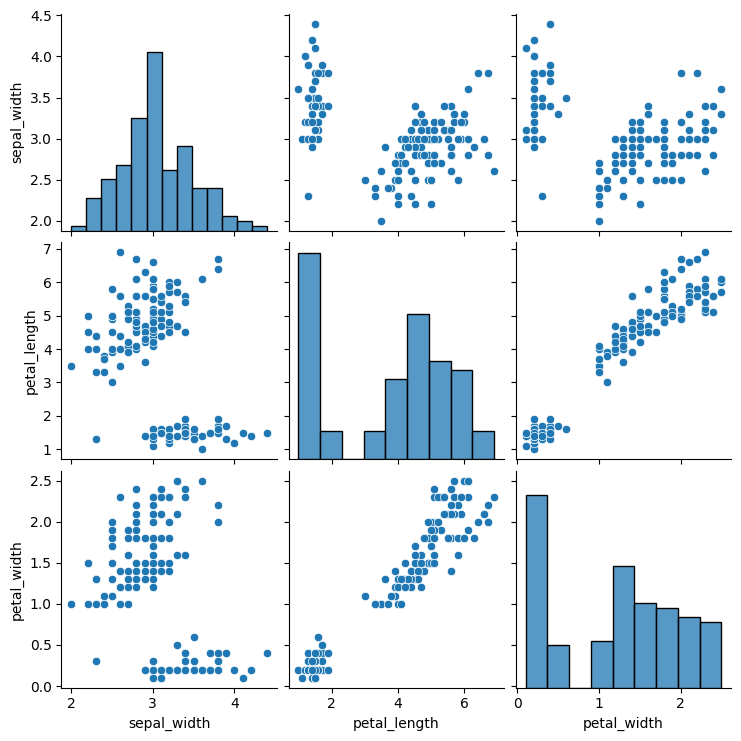

In [ ]:
sns.pairplot(df)

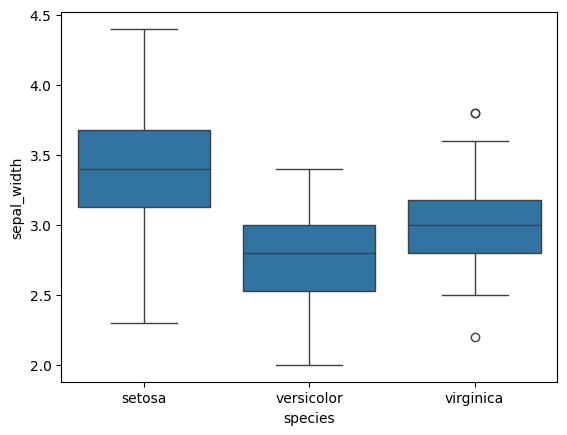

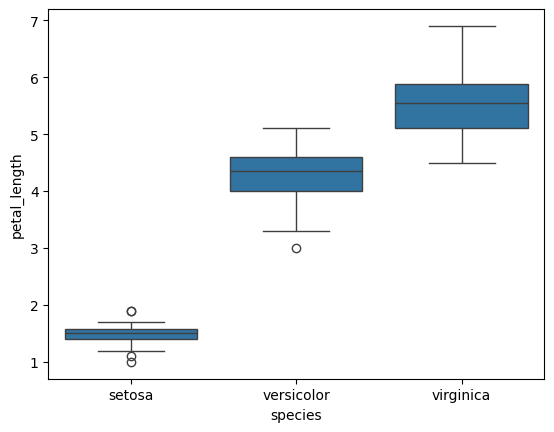

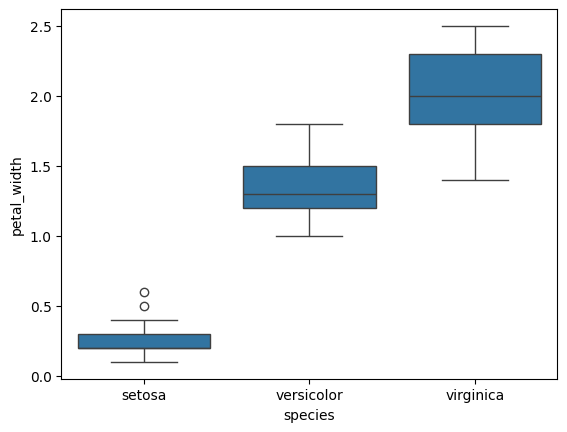

<Figure size 640x480 with 0 Axes>

In [ ]:
for i in range(len(l)-1):
    sns.boxplot(x='species',y=l[i], data=df)
    plt.figure()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(df.drop('species',axis=1))
scaled_features = scaler.transform(df.drop('species',axis=1))

In [ ]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,sepal_width,petal_length,petal_width
0,1.032057,-1.341272,-1.312977
1,-0.124958,-1.341272,-1.312977
2,0.337848,-1.398138,-1.312977
3,0.106445,-1.284407,-1.312977
4,1.263460,-1.341272,-1.312977


In [ ]:
from sklearn.model_selection import train_test_split
X = df_feat
y = df['species']
X_train, X_test, y_train, y_test =train_test_split(scaled_features,df['species'],
                 test_size=0.20, random_state=101)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
conf_mat=confusion_matrix(y_test,pred)
print(conf_mat)

[[10  0  0]
 [ 0 11  1]
 [ 0  1  7]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.92      0.92      0.92        12
   virginica       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [ ]:
print("Misclassification error rate:",round(np.mean(pred!=y_test),3))

Misclassification error rate: 0.067


In [ ]:
error_rate = []

# Will take some time
for i in range(1,60):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error (misclassification) Rate')

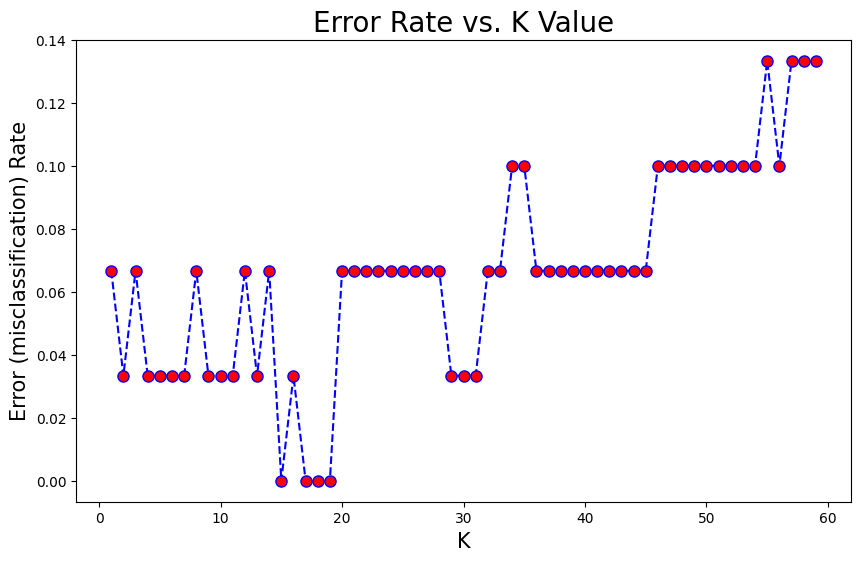

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value', fontsize=20)
plt.xlabel('K',fontsize=15)
plt.ylabel('Error (misclassification) Rate',fontsize=15)